In [12]:
# グラフを移動拡大縮小したい場合
%matplotlib notebook
# グラフをインラインで表示
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML

In [3]:
# 表示する行の数を設定
pd.options.display.max_rows = 5

#matplotlibのフォントを設定
plt.rcParams['font.family'] = 'Time New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

Text(0.5, 1.0, 'Concept of ANB and ALB')

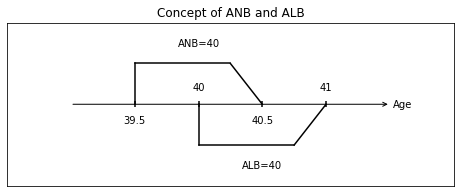

In [13]:
# ALB と ANBの違いの概念図

fig = plt.figure(figsize = (8, 3))
ax = fig.add_subplot(111)
ax.annotate(s='', xytext = [39,0],xy = [41.5, 0],
           arrowprops = dict(arrowstyle = '->', color = 'k'))
ax.text(41.6, 0, 'Age', va = 'center', ha = 'center')


# ANB
ax.plot([39.5, 40.25], [0.5, 0.5], c='k')
ax.plot([39.5, 39.5], [0, 0.5], c='k')
ax.plot([40.25, 40.5], [0.5, 0], c='k')
ax.text(40, 0.75, 'ANB=40', va='center', ha='center')
# ALB
ax.plot([40, 40.75], [-0.5, -0.5], c='k')
ax.plot([40, 40], [0, -0.5], c='k')
ax.plot([40.75, 41], [-0.5, 0], c='k')
ax.text(40.5, -0.75, 'ALB=40', va='center', ha='center')

# Age
ax.text(39.5, -0.2, '39.5', va='center', ha='center')
ax.text(40, 0.2, '40', va='center', ha='center')
ax.text(40.5, -0.2, '40.5', va='center', ha='center')
ax.text(41, 0.2, '41', va='center', ha='center')
X = np.arange(4) / 2 + 39.5
Y = np.zeros(4)
ax.scatter(X, Y, c='k', marker='|')
ax.set_xlim(38.5, 42)
ax.set_xticklabels('')
ax.set_ylim(-1, 1)
ax.set_yticklabels('')
ax.tick_params(top=False, bottom=False, left=False, right=False)
ax.set_title('Concept of ANB and ALB')

In [14]:
url = 'http://www.ipss.go.jp/p-toukei/JMD/00/STATS/Births.txt'

df_train = pd.read_csv(url, skiprows = 1, delim_whitespace = True)

df_train.head()    

Exception ignored in: <function Comm.__del__ at 0x7fd88db82cb0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('edae56e8f3ca4634b06a38ef63c7b28a',)
Exception ignored in: <function Comm.__del__ at 0x7fd88db82cb0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/comm/manager.py", line 56, i

,Year,Female,Male,Total
0,1947,1301806,1376986,2678792
1,1948,1303060,1378564,2681624
2,1949,1316630,1380008,2696638
3,1950,1134396,1203111,2337507
4,1951,1043048,1094641,2137689


In [19]:
df_birth_F = df_train[["Year", "Female"]].copy()
# 1はlife(生存者)の頭文字
df_birth_F.columns = ["year", "1"]
df_birth_F['sex'] = "F"

In [20]:
df_birth_M = df_train[['Year', "Male"]].copy()
df_birth_M.columns = ["year", "1"]
df_birth_M['sex'] = "M"

In [23]:
df = pd.concat([df_birth_F, df_birth_M], axis = 0, ignore_index = True)

In [24]:
df.head()

,year,1,sex
0,1947,1301806,F
1,1948,1303060,F
2,1949,1316630,F
3,1950,1134396,F
4,1951,1043048,F


In [26]:
df["ratio"] = df["1"] / df["1"].sum()
df["cum_ratio"] = df["ratio"].cumsum()

In [27]:
del df["1"]

df.head()

,year,sex,ratio,cum_ratio
0,1947,F,0.012150,0.012150
1,1948,F,0.012162,0.024311
2,1949,F,0.012288,0.036600
3,1950,F,0.010587,0.047187
4,1951,F,0.009735,0.056922


In [28]:
df.to_csv('ipss_birth.csv', index = False)

In [31]:
df_birth = pd.read_csv('ipss_birth.csv')
df_birth.head()

,year,sex,ratio,cum_ratio
0,1947,F,0.012150,0.012150
1,1948,F,0.012162,0.024311
2,1949,F,0.012288,0.036600
3,1950,F,0.010587,0.047187
4,1951,F,0.009735,0.056922


Text(0.5, 1.0, 'Cumulative Ratio of Population Birth')

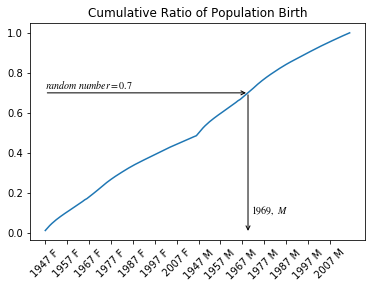

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 折れ線
x = df_birth.index
y = df_birth['cum_ratio']
ax.plot(x, y)

xlabels = df_birth['year'].apply(str) + ' ' + df_birth['sex']
ax.set_xticks(x[::10])
ax.set_xticklabels(xlabels[::10], rotation='45')

# 水平矢印
ax.annotate(s='', xytext=[0, 0.7], xy=[92.57888, 0.7],
 arrowprops=dict(arrowstyle='->', color='k'))
# 垂直矢印
ax.annotate(s='', xytext=[92.57888, 0.7], xy=[92.57888, 0],
 arrowprops=dict(arrowstyle='->', color='k'))
# テキスト
ax.text(x=0, y=0.72, s='$random\ number=0.7$')
ax.text(x=94, y=0.1, s='$1969,\ M$')
# タイトル
ax.set_title('Cumulative Ratio of Population Birth')

In [43]:
url = 'http://www.ipss.go.jp/p-toukei/JMD/00/STATS/Mx_1x1.txt'

df_mortality = pd.read_csv(url, skiprows = 1, delim_whitespace = True)
df_mortality.head()

,Year,Age,Female,Male,Total
0,1947,0,0.087401,0.099181,0.093432
1,1947,1,0.033723,0.034697,0.034220
2,1947,2,0.016994,0.016804,0.016897
3,1947,3,0.011412,0.011461,0.011437
4,1947,4,0.006918,0.007337,0.007130


In [44]:
df_mortality.dtypes

Year       int64
Age       object
Female    object
Male      object
Total     object
dtype: object

In [45]:
df_mortality = df_mortality[df_mortality['Year'] == 2016].copy()
df_mortality['Age'].replace('110+', '110', inplace = True)

dict_types = {'Year':'int16', 'Age':'int16', 'Female':'float64', 'Male':'float64', 'Total':'float64'}

df_mortality = df_mortality.astype(dict_types)

df_mortality.dtypes

Year        int16
Age         int16
Female    float64
Male      float64
Total     float64
dtype: object

In [46]:
del df_mortality['Year']
del df_mortality['Total']

df_mortality.columns = ['anb', 'F', 'M']


In [47]:
df_mortality["F"] = (df_mortality['F'] + df_mortality['F'].shift(-1))/2
df_mortality["M"] = (df_mortality['M'] + df_mortality['M'].shift(-1))/2

df_mortality.columns = ['alb', 'F', 'M']

df_mortality.head()

,alb,F,M
7659,0,0.001170,0.001167
7660,1,0.000244,0.000259
7661,2,0.000136,0.000155
7662,3,0.000092,0.000114
7663,4,0.000085,0.000098


Text(0.5, 1.0, 'Moratality')

findfont: Font family ['Time New Roman'] not found. Falling back to DejaVu Sans.


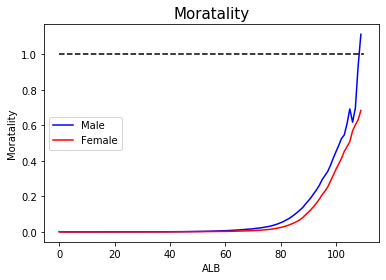

In [48]:
# 年齢別に死亡率を可視化

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df_mortality.alb, df_mortality.M, c = 'b', label = "Male")
ax.plot(df_mortality.alb, df_mortality.F, c = 'r', label = "Female")

ax.plot([0, 110], [1, 1], c = 'k', ls = '--')
ax.set_xlabel('ALB')
ax.set_ylabel('Moratality')

ax.legend(loc = 'best')
ax.set_title("Moratality", fontsize = 15)

In [49]:
df_mortality = df_mortality[df_mortality['alb'] < 100].copy()
df_mortality.head()

,alb,F,M
7659,0,0.001170,0.001167
7660,1,0.000244,0.000259
7661,2,0.000136,0.000155
7662,3,0.000092,0.000114
7663,4,0.000085,0.000098


In [50]:
df_mortality.loc[:, 'F'] = 1 - (1 - df_mortality["F"])**(1/12)
df_mortality.loc[:, 'M'] = 1 - (1 - df_mortality["M"])**(1/12)

df_mortality.head()

,alb,F,M
7659,0,0.000098,0.000097
7660,1,0.000020,0.000022
7661,2,0.000011,0.000013
7662,3,0.000008,0.000010
7663,4,0.000007,0.000008


In [52]:
df_mortality.to_csv('ipss_mortality.csv', index = False)